In [3]:
import pandas as pd

# Analiza prodajanih avtomobilov znamke Audi

Iz spletne strani https://www.avto.net sem zajela naslednje podatke o vseh vozilih znamke Audi, ki se tam prodajajo:

* ime vozila 
* prva registracija
* prvoženi kilometri
* tip motorja 
* cena 

Ti podatki so prikazani v spodnji tabeli.


In [4]:
pd.options.display.max_rows = 8 # Nastavitev maks. št. prikazanih vrstic v tabeli
audiji = pd.read_csv('audi_data.csv', index_col ='Indeks')
audiji

,Ime,Prva registracija,Prevozeni km,Tip motorja,Cena,Unnamed: 6
Indeks,,,,,,
12795163,b'Audi A4 Avant 1.9 TDI. servisna knjiga p...',2006,228000 km,diesel motor,5.890,NaN
12795041,b'Audi A4 1.8',1998,305000 km,bencinski motor,1.200,NaN
12795036,b'Audi A6 2.0 TDI ULTRA ZRA\xc3\x88NO+KAMERA+U...,2014,150000 km,diesel motor,22.280,NaN
12794988,b'Audi A6 2.0 TDI',2005,264000 km,diesel motor,6.500,NaN
...,...,...,...,...,...,...
12793679,b'Audi A6 Avant 2.0 TDI - SPORT PAKET - NA...',2010,186400 km,diesel motor,10.999,NaN
12793669,b'Audi Q3 2.0 TDI NAVI-ALU-ODLI\xc3\x88EN...',2012,159827 km,diesel motor,15.750,NaN
12793657,b'Audi A4 2.0 TDI',2005,203000 km,diesel motor,4.600,NaN
12793648,b'Audi A4 1.9 TDI',2002,340000 km,diesel motor,2.950,NaN


## UVOD 

Pri kupovanju rabljenih in novih avtomobilov skoraj vsi pogledajo ponudbo tudi na spletni strani https://www.avto.net. In ker je znamka Audi ena izmed bolj priljubljenih znamk med slovenskim prebivalstvom sem se odločila da bom analizirala prav to. Verjetno so najpomembnejše lastnosti, na podlagi katerih se odločimo da bomo kupili prav to vozilo, cena, starost vozila, prevoženi kilometri in tip motorja. Seveda so pomembne tudi druge lastnosti, a za okvirno analizo bo tudi to dovolj.

## TIP MOTORJA

Vozila imajo več tipov motorja. Pri Audijih v tabeli so to: dizel motor, bencinski motor in bencinski motor predelan na plin - bencinski motor + plin. 
Najprej si poglejmo katerih tipov motorja se prodaja največ.

In [5]:
audiji.groupby('Tip motorja').size().plot(kind='bar')


Graf pokaže da da se daleč največ prodaja avtomobile z diesel motorjem, in (kot pričakovano) najmanj avtomobilov na plin. 

In [6]:
audiji.groupby('Tip motorja').mean()['Cena']

Tip motorja
bencinski motor           4.780000
bencinski motor + plin    4.175000
diesel motor              9.455535
Name: Cena, dtype: float64

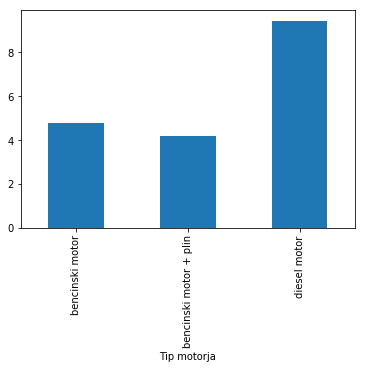

In [12]:
audiji.groupby('Tip motorja').mean()['Cena'].plot(kind='bar')

Iz zgornjega izračuna in grafa vidimo, da se najdražji avtomobili z diesel motorjem, potem bencinski in nato avtomobili na plin. Najbolj ugoden za nakup je zato avto na plin, saj je v povprečju najcenejši, poleg tega pa je tudi sam plin zelo poceni. Če pa izbirate avto z drugačnim tipom motorja boste za avto z diesel motorjem odšteli več denarja, a boste imeli cenejše gorivo kot pri avtu z bencinskim motorjem.

## PRVA REGISTRACIJA (starost avtomobila)
 
Starejša vozla bodo imela verjetno nižje cene in več prevoženih kilometrov. Če to res drži se lahko prepričamo z naslednjim izračunom.

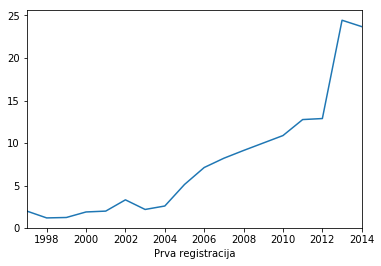

In [35]:
audiji.groupby('Prva registracija').mean()['Cena'].plot()

In [19]:
audiji['Prva registracija'].sort_values().head(1)

Indeks
12793893    1997
Name: Prva registracija, dtype: int64

In [18]:
audiji[audiji['Prva registracija'] < 1988]

,Ime,Prva registracija,Prevozeni km,Tip motorja,Cena,Unnamed: 6
Indeks,,,,,,


Avto, ki je starejši od 30 let, velja za "oldtaimerja". Na tej spletni strani se zato ne prodaja noben "oldtimer".

In [32]:
audiji.plot.scatter('Prevozeni km', 'Prva registracija')

ValueError: scatter requires x column to be numeric

## PREVOŽENI KILOMETRI


In [23]:
audiji.sort_values('Prevozeni km').tail(10)

,Ime,Prva registracija,Prevozeni km,Tip motorja,Cena,Unnamed: 6
Indeks,,,,,,
12794597,b'Audi A6 Avant 2.0 TDI-SERVISNA.LED.PDC.M...',2013,69000 km,diesel motor,26.89,NaN
12794597,b'Audi A6 Avant 2.0 TDI-SERVISNA.LED.PDC.M...',2013,69000 km,diesel motor,26.89,NaN
12794597,b'Audi A6 Avant 2.0 TDI-SERVISNA.LED.PDC.M...',2013,69000 km,diesel motor,26.89,NaN
12794597,b'Audi A6 Avant 2.0 TDI-SERVISNA.LED.PDC.M...',2013,69000 km,diesel motor,26.89,NaN
...,...,...,...,...,...,...
12794597,b'Audi A6 Avant 2.0 TDI-SERVISNA.LED.PDC.M...',2013,69000 km,diesel motor,26.89,NaN
12794597,b'Audi A6 Avant 2.0 TDI-SERVISNA.LED.PDC.M...',2013,69000 km,diesel motor,26.89,NaN
12794597,b'Audi A6 Avant 2.0 TDI-SERVISNA.LED.PDC.M...',2013,69000 km,diesel motor,26.89,NaN
12794597,b'Audi A6 Avant 2.0 TDI-SERVISNA.LED.PDC.M...',2013,69000 km,diesel motor,26.89,NaN


## CENA 


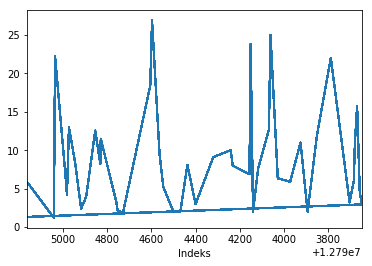

In [43]:
audiji['Cena'].plot()

In [63]:
približne_cene = 1 * (audiji['Cena'] // 1)

In [72]:
audiji.groupby(približne_cene)['Prva registracija'].mean()

Cena
1.0     2000.007407
2.0     2001.166667
3.0     2002.500000
4.0     2005.000000
           ...     
22.0    2014.000000
23.0    2014.000000
24.0    2014.000000
26.0    2013.000000
Name: Prva registracija, Length: 20, dtype: float64

In [60]:
%matplotlib inline